GROUP ANALYSIS (FULL DURATION ANALYSIS)
optimized version of 1.0.0 to facilitate lesser variables
** same out as grpRuns_1.0.0
-   Music Therapy and Control Group
-   Notch Filter fixed to remove line noise
-   ICA utilized to remove ocular artifacts
-   No sliding window utilized in analysis
-   The jupyter script is used to carry out the analysis of group runs
-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
-   The average of all scans in music therapy group and control group was used to develop the spectograms


In [1]:
from helper import*
import params as cfg

In [2]:
"Functions utilized in this script"
def multipleFilesICA(input_3d,fs):
    ica_out = []
    for i in range(input_3d.shape[0]):
        ica_out.append(ica(input_3d[i,:,:],fs))
    return np.array(ica_out)
def multipleFilesNotch(input_3d,fs):
    notch_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        notch_out.append(filtering.notch(input_3d[i,:,:],fs))
    return np.array(notch_out)
def multipleFilesbutterBandpass(input_3d,lowcut,highcut,fs):
    butter_out = []
    filtering = filters()
    for i in range(input_3d.shape[0]):
        butter_out.append(filtering.butterBandPass(input_3d[i,:,:],lowcut,highcut,fs))
    return np.array(butter_out)
def multipleAvgBandPower(input_3d,fs,low,high):
    avg_out = []
    for i in range(input_3d.shape[0]):
        avg_out.append(avgBandPower(input_3d[i,:,:],fs,low,high))
    return np.array(avg_out)

In [3]:
#   Group-Task-Time
M11 = ['m11_1.zip','m11_2.zip','m11_3.zip','m11_4.zip','m11_5.zip']
M21 = ['m21_1.zip','m21_2.zip','m21_3.zip','m21_4.zip','m21_5.zip']
M12 = ['m12_1.zip','m12_2.zip','m12_3.zip','m12_4.zip','m12_5.zip']
M22 = ['m22_1.zip','m22_2.zip','m22_3.zip','m22_4.zip','m22_5.zip']
C11 = ['c11_1.zip','c11_2.zip','c11_3.zip','c11_4.zip','c11_5.zip']
C21 = ['c21_1.zip','c21_2.zip','c21_3.zip','c21_4.zip','c21_5.zip']
C12 = ['c12_1.zip','c12_2.zip','c12_3.zip','c12_4.zip','c12_5.zip']
C22 = ['c22_1.zip','c22_2.zip','c22_3.zip','c22_4.zip','c22_5.zip']
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

In [4]:
"Extract data for every participant within both groups"

#   Music Therapy Group
M11 = zipExtract(M11,localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M21 = zipExtract(M21,localDir,destDir,"M21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M12 = zipExtract(M12,localDir,destDir,"M12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
M22 = zipExtract(M22,localDir,destDir,"M22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]

#   Control Group
C11 = zipExtract(C11,localDir,destDir,"C11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C21 = zipExtract(C21,localDir,destDir,"C21",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C12 = zipExtract(C12,localDir,destDir,"C12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
C22 = zipExtract(C22,localDir,destDir,"C22",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]


In [5]:
#   Music Therapy Group:
ica_M11 = multipleFilesICA(M11,cfg.fs)
ica_M21 = multipleFilesICA(M21,cfg.fs)
ica_M12 = multipleFilesICA(M12,cfg.fs)
ica_M22 = multipleFilesICA(M22,cfg.fs)

#   Control Group: 
ica_C11 = multipleFilesICA(C11,cfg.fs)
ica_C21 = multipleFilesICA(C21,cfg.fs)
ica_C12 = multipleFilesICA(C12,cfg.fs)
ica_C22 = multipleFilesICA(C22,cfg.fs)

In [6]:
filtering = filters()

#   Music Therapy Group:
noc_M11 = multipleFilesNotch(ica_M11,cfg.fs)
noc_M21 = multipleFilesNotch(ica_M21,cfg.fs)
noc_M12 = multipleFilesNotch(ica_M12,cfg.fs)
noc_M22 = multipleFilesNotch(ica_M22,cfg.fs)

#   Control Group:
noc_C11 = multipleFilesNotch(ica_C11,cfg.fs)
noc_C21 = multipleFilesNotch(ica_C21,cfg.fs)
noc_C12 = multipleFilesNotch(ica_C12,cfg.fs)
noc_C22 = multipleFilesNotch(ica_C22,cfg.fs)


In [7]:
#   Music Therapy Group:
bp_M11 = multipleFilesbutterBandpass(noc_M11,cfg.lowcut,cfg.highcut,cfg.fs)
bp_M21 = multipleFilesbutterBandpass(noc_M21,cfg.lowcut,cfg.highcut,cfg.fs)
bp_M12 = multipleFilesbutterBandpass(noc_M12,cfg.lowcut,cfg.highcut,cfg.fs)
bp_M22 = multipleFilesbutterBandpass(noc_M22,cfg.lowcut,cfg.highcut,cfg.fs)

#   Control Group:
bp_C11 = multipleFilesbutterBandpass(noc_C11,cfg.lowcut,cfg.highcut,cfg.fs)
bp_C21 = multipleFilesbutterBandpass(noc_C21,cfg.lowcut,cfg.highcut,cfg.fs)
bp_C12 = multipleFilesbutterBandpass(noc_C12,cfg.lowcut,cfg.highcut,cfg.fs)
bp_C22 = multipleFilesbutterBandpass(noc_C22,cfg.lowcut,cfg.highcut,cfg.fs)

/Users/joshuaighalo/Documents/GitHub/eegMusicTherapy/helper.py:240: RuntimeWarning: invalid value encountered in log10
  power = 20*np.log10((data[:,i]))


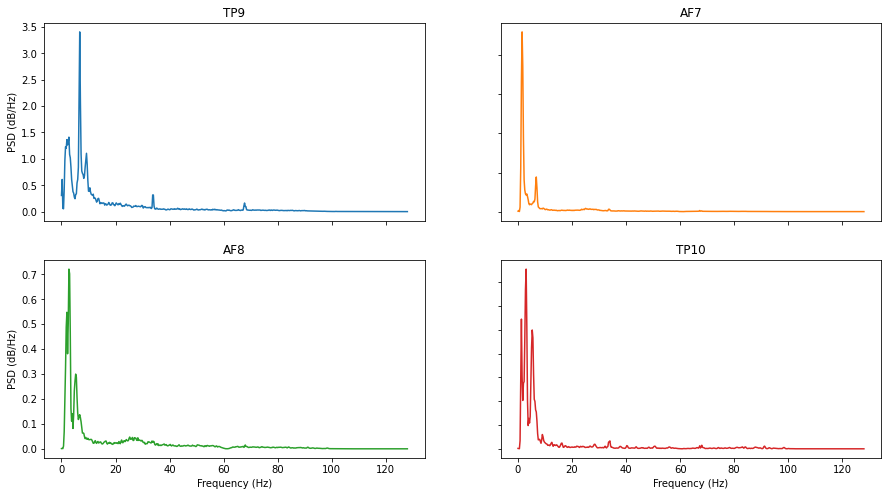

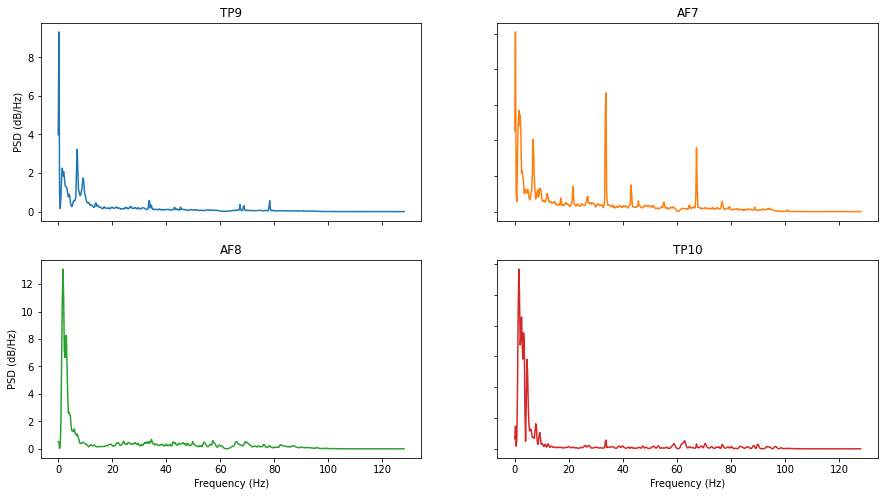

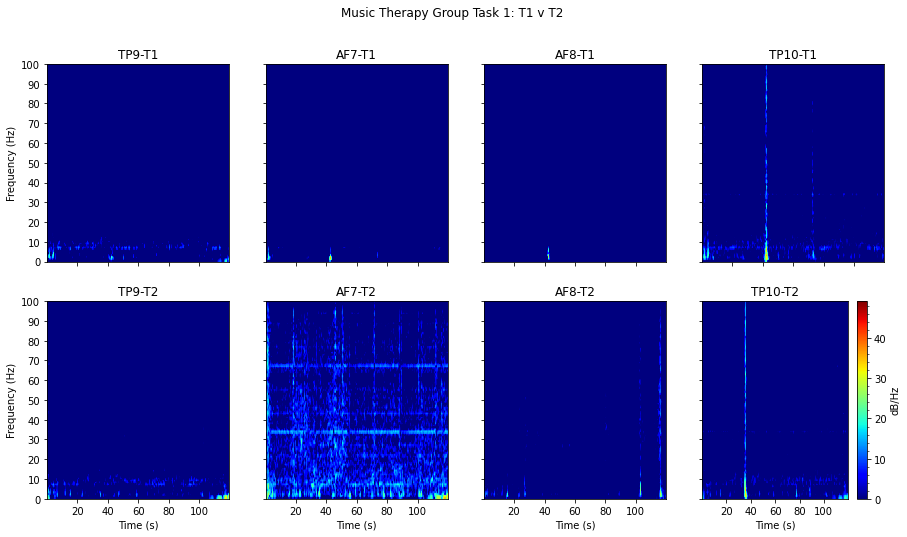

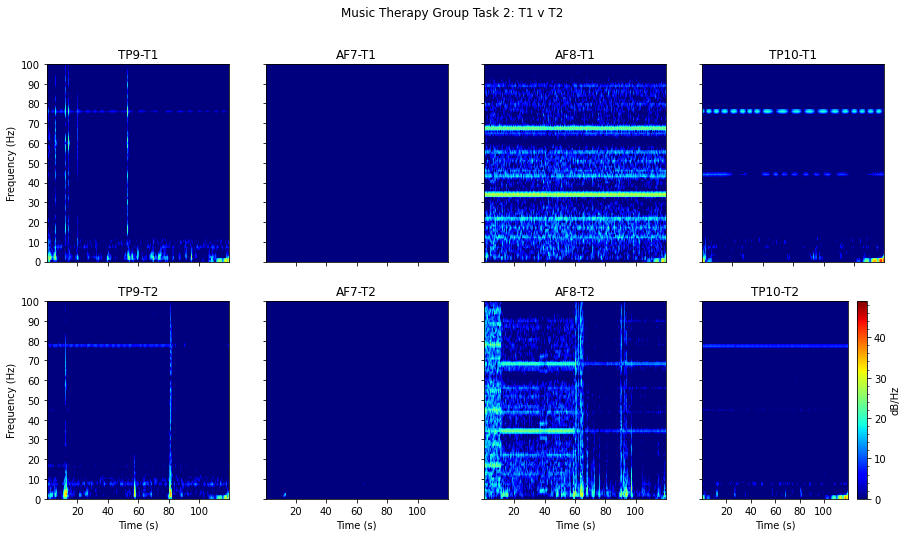

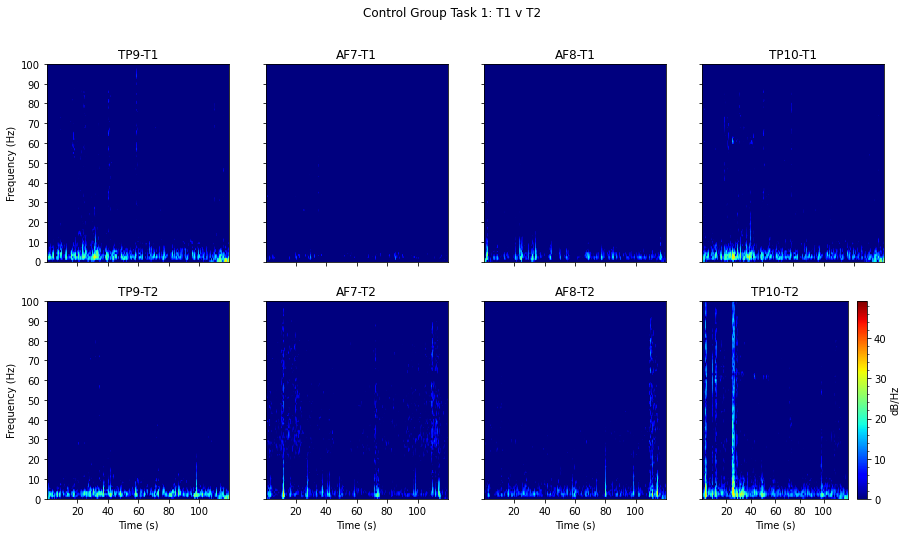

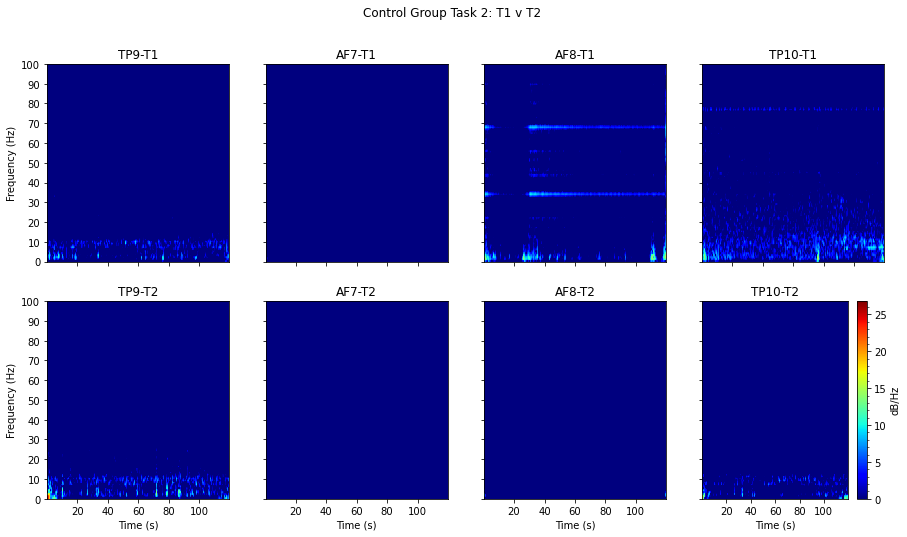

In [8]:
#   Spectogram Plots: Take average of groups and plot spectogram from resulting average

#   Music Therapy Group:
avg_M11 = np.mean(bp_M11,axis=0)
avg_M21 = np.mean(bp_M21,axis=0)
avg_M12 = np.mean(bp_M12,axis=0)
avg_M22 = np.mean(bp_M22,axis=0)

#   Control Group:
avg_C11 = np.mean(bp_C11,axis=0)
avg_C21 = np.mean(bp_C21,axis=0)
avg_C12 = np.mean(bp_C12,axis=0)
avg_C22 = np.mean(bp_C22,axis=0)

psdPlots(avg_M11,cfg.fs,cfg.channels)
psdPlots(avg_M12,cfg.fs,cfg.channels)

#   Spectogram Plots
spectogramPlot((np.hstack((avg_M11,avg_M12))),cfg.fs,cfg.nfft,cfg.noverlap,(15,8),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((avg_M21,avg_M22))),cfg.fs,cfg.nfft,cfg.noverlap,(15,8),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((avg_C11,avg_C12))),cfg.fs,cfg.nfft,cfg.noverlap,(15,8),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((avg_C21,avg_C22))),cfg.fs,cfg.nfft,cfg.noverlap,(15,8),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')

In [9]:
# compute power spectrum of each window per channel
delta_low,delta_high = cfg.brainwaves['delta'][0],cfg.brainwaves['delta'][1]
theta_low,theta_high = cfg.brainwaves['theta'][0],cfg.brainwaves['theta'][1]
alpha_low,alpha_high = cfg.brainwaves['alpha'][0],cfg.brainwaves['alpha'][1]
beta_low,beta_high = cfg.brainwaves['beta'][0],cfg.brainwaves['beta'][1]
gamma_low,gamma_high = cfg.brainwaves['gamma'][0],cfg.brainwaves['gamma'][1]

In [10]:
#  Music Therapy Group: Delta Band
delta_M11 = multipleAvgBandPower(bp_M11,cfg.fs,delta_low,delta_high)
delta_M21 = multipleAvgBandPower(bp_M21,cfg.fs,delta_low,delta_high)
delta_M12 = multipleAvgBandPower(bp_M12,cfg.fs,delta_low,delta_high)
delta_M22 = multipleAvgBandPower(bp_M22,cfg.fs,delta_low,delta_high)

#  Control Group: Delta Band
delta_C11 = multipleAvgBandPower(bp_C11,cfg.fs,delta_low,delta_high)
delta_C21 = multipleAvgBandPower(bp_C21,cfg.fs,delta_low,delta_high)
delta_C12 = multipleAvgBandPower(bp_C12,cfg.fs,delta_low,delta_high)
delta_C22 = multipleAvgBandPower(bp_C22,cfg.fs,delta_low,delta_high)

#  Music Therapy Group: Theta Band
theta_M11 = multipleAvgBandPower(bp_M11,cfg.fs,theta_low,theta_high)
theta_M21 = multipleAvgBandPower(bp_M21,cfg.fs,theta_low,theta_high)
theta_M12 = multipleAvgBandPower(bp_M12,cfg.fs,theta_low,theta_high)
theta_M22 = multipleAvgBandPower(bp_M22,cfg.fs,theta_low,theta_high)

#  Control Group: Theta Band
theta_C11 = multipleAvgBandPower(bp_C11,cfg.fs,theta_low,theta_high)
theta_C21 = multipleAvgBandPower(bp_C21,cfg.fs,theta_low,theta_high)
theta_C12 = multipleAvgBandPower(bp_C12,cfg.fs,theta_low,theta_high)
theta_C22 = multipleAvgBandPower(bp_C22,cfg.fs,theta_low,theta_high)

#  Music Therapy Group: Alpha Band
alpha_M11 = multipleAvgBandPower(bp_M11,cfg.fs,alpha_low,alpha_high)
alpha_M21 = multipleAvgBandPower(bp_M21,cfg.fs,alpha_low,alpha_high)
alpha_M12 = multipleAvgBandPower(bp_M12,cfg.fs,alpha_low,alpha_high)
alpha_M22 = multipleAvgBandPower(bp_M22,cfg.fs,alpha_low,alpha_high)

#  Control Group: Alpha Band
alpha_C11 = multipleAvgBandPower(bp_C11,cfg.fs,alpha_low,alpha_high)
alpha_C21 = multipleAvgBandPower(bp_C21,cfg.fs,alpha_low,alpha_high)
alpha_C12 = multipleAvgBandPower(bp_C12,cfg.fs,alpha_low,alpha_high)
alpha_C22 = multipleAvgBandPower(bp_C22,cfg.fs,alpha_low,alpha_high)

#  Music Therapy Group: Beta Band
beta_M11 = multipleAvgBandPower(bp_M11,cfg.fs,beta_low,beta_high)
beta_M21 = multipleAvgBandPower(bp_M21,cfg.fs,beta_low,beta_high)
beta_M12 = multipleAvgBandPower(bp_M12,cfg.fs,beta_low,beta_high)
beta_M22 = multipleAvgBandPower(bp_M22,cfg.fs,beta_low,beta_high)

#  Control Group: Beta Band
beta_C11 = multipleAvgBandPower(bp_C11,cfg.fs,beta_low,beta_high)
beta_C21 = multipleAvgBandPower(bp_C21,cfg.fs,beta_low,beta_high)
beta_C12 = multipleAvgBandPower(bp_C12,cfg.fs,beta_low,beta_high)
beta_C22 = multipleAvgBandPower(bp_C22,cfg.fs,beta_low,beta_high)

#  Music Therapy Group: Gamma Band
gamma_M11 = multipleAvgBandPower(bp_M11,cfg.fs,gamma_low,gamma_high)
gamma_M21 = multipleAvgBandPower(bp_M21,cfg.fs,gamma_low,gamma_high)
gamma_M12 = multipleAvgBandPower(bp_M12,cfg.fs,gamma_low,gamma_high)
gamma_M22 = multipleAvgBandPower(bp_M22,cfg.fs,gamma_low,gamma_high)

#  Control Group: Gamma Band
gamma_C11 = multipleAvgBandPower(bp_C11,cfg.fs,gamma_low,gamma_high)
gamma_C21 = multipleAvgBandPower(bp_C21,cfg.fs,gamma_low,gamma_high)
gamma_C12 = multipleAvgBandPower(bp_C12,cfg.fs,gamma_low,gamma_high)
gamma_C22 = multipleAvgBandPower(bp_C22,cfg.fs,gamma_low,gamma_high)

/Users/joshuaighalo/Documents/GitHub/eegMusicTherapy/helper.py:64: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, fs, adaptive=True,
/Users/joshuaighalo/Documents/GitHub/eegMusicTherapy/helper.py:64: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, fs, adaptive=True,
/Users/joshuaighalo/Documents/GitHub/eegMusicTherapy/helper.py:64: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, fs, adaptive=True,
/Users/joshuaighalo/Documents/GitHub/eegMusicTherapy/helper.py:64: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, fs, adaptive=True,
/Users/joshuaighalo/Documents/GitHub/eegMusicTherapy/helper.py:64: RuntimeWarning: Iterative multi-taper PSD computation did not converge.
  psd, freqs = psd_array_multitaper(data, fs, adaptive=True,


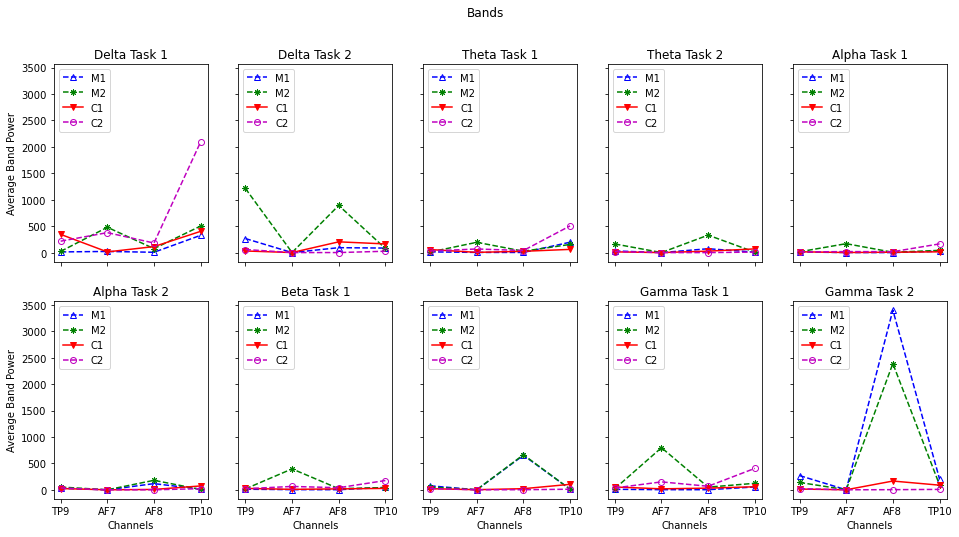

In [11]:
#   BandPower Plots: Channels x Groups x Tasks
stackBands = np.dstack((np.asarray([np.mean(delta_M11,axis=0),np.mean(delta_M12,axis=0),np.mean(delta_C11,axis=0),np.mean(delta_C12,axis=0)]),
                        np.asarray([np.mean(delta_M21,axis=0),np.mean(delta_M22,axis=0),np.mean(delta_C21,axis=0),np.mean(delta_C22,axis=0)]),
                        np.asarray([np.mean(theta_M11,axis=0),np.mean(theta_M12,axis=0),np.mean(theta_C11,axis=0),np.mean(theta_C12,axis=0)]),
                        np.asarray([np.mean(theta_M21,axis=0),np.mean(theta_M22,axis=0),np.mean(theta_C21,axis=0),np.mean(theta_C22,axis=0)]),
                        np.asarray([np.mean(alpha_M11,axis=0),np.mean(alpha_M12,axis=0),np.mean(alpha_C11,axis=0),np.mean(alpha_C12,axis=0)]),
                        np.asarray([np.mean(alpha_M21,axis=0),np.mean(alpha_M22,axis=0),np.mean(alpha_C21,axis=0),np.mean(alpha_C22,axis=0)]),
                        np.asarray([np.mean(beta_M11,axis=0),np.mean(beta_M12,axis=0),np.mean(beta_C11,axis=0),np.mean(beta_C12,axis=0)]),
                        np.asarray([np.mean(beta_M21,axis=0),np.mean(beta_M22,axis=0),np.mean(beta_C21,axis=0),np.mean(beta_C22,axis=0)]),
                        np.asarray([np.mean(gamma_M11,axis=0),np.mean(gamma_M12,axis=0),np.mean(gamma_C11,axis=0),np.mean(gamma_C12,axis=0)]),
                        np.asarray([np.mean(gamma_M21,axis=0),np.mean(gamma_M22,axis=0),np.mean(gamma_C21,axis=0),np.mean(gamma_C22,axis=0)])))
stackBands = np.transpose(stackBands,(2,0,1))
subTitles = ['Delta Task 1','Delta Task 2','Theta Task 1',
                'Theta Task 2','Alpha Task 1','Alpha Task 2',
                'Beta Task 1','Beta Task 2','Gamma Task 1','Gamma Task 2']
bandPowerPlots(cfg.channels,stackBands,(16,8),subTitles,title='Bands',label=['M1','M2','C1','C2'])

In [12]:
"Export results to .csv for further analysis in R and SPSS"

#   create destination directory for exported csv files
csv_dest_dir = '/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/1.0.1/'
shutil.rmtree(csv_dest_dir, ignore_errors=True)
os.makedirs(csv_dest_dir)


#   export delta band power results to .csv
delta_TK1TP1_TP9,delta_TK1TP2_TP9,delta_TK2TP1_TP9,delta_TK2TP2_TP9 = [np.hstack((delta_M11[:,0],delta_C11[:,0])),np.hstack((delta_M12[:,0],delta_C12[:,0])),np.hstack((delta_M21[:,0],delta_C21[:,0])),np.hstack((delta_M22[:,0],delta_C22[:,0]))]
delta_TK1TP1_AF7,delta_TK1TP2_AF7,delta_TK2TP1_AF7,delta_TK2TP2_AF7 = [np.hstack((delta_M11[:,1],delta_C11[:,1])),np.hstack((delta_M12[:,1],delta_C12[:,1])),np.hstack((delta_M21[:,1],delta_C21[:,1])),np.hstack((delta_M22[:,1],delta_C22[:,1]))]
delta_TK1TP1_AF8,delta_TK1TP2_AF8,delta_TK2TP1_AF8,delta_TK2TP2_AF8 = [np.hstack((delta_M11[:,2],delta_C11[:,2])),np.hstack((delta_M12[:,2],delta_C12[:,2])),np.hstack((delta_M21[:,2],delta_C21[:,2])),np.hstack((delta_M22[:,2],delta_C22[:,2]))]
delta_TK1TP1_TP10,delta_TK1TP2_TP10,delta_TK2TP1_TP10,delta_TK2TP2_TP10 = [np.hstack((delta_M11[:,3],delta_C11[:,3])),np.hstack((delta_M12[:,3],delta_C12[:,3])),np.hstack((delta_M21[:,3],delta_C21[:,3])),np.hstack((delta_M22[:,3],delta_C22[:,3]))]
delta_TK1TP1_mean,delta_TK1TP2_mean,delta_TK2TP1_mean,delta_TK2TP2_mean = [np.mean(np.vstack((delta_TK1TP1_TP9,delta_TK1TP1_AF7,delta_TK1TP1_AF8,delta_TK1TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((delta_TK1TP2_TP9,delta_TK1TP2_AF7,delta_TK1TP2_AF8,delta_TK1TP2_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((delta_TK2TP1_TP9,delta_TK2TP1_AF7,delta_TK2TP1_AF8,delta_TK2TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((delta_TK2TP2_TP9,delta_TK2TP2_AF7,delta_TK2TP2_AF8,delta_TK2TP2_TP10)).T,axis=1)]

theta_TK1TP1_TP9,theta_TK1TP2_TP9,theta_TK2TP1_TP9,theta_TK2TP2_TP9 = [np.hstack((theta_M11[:,0],theta_C11[:,0])),np.hstack((theta_M12[:,0],theta_C12[:,0])),np.hstack((theta_M21[:,0],theta_C21[:,0])),np.hstack((theta_M22[:,0],theta_C22[:,0]))]
theta_TK1TP1_AF7,theta_TK1TP2_AF7,theta_TK2TP1_AF7,theta_TK2TP2_AF7 = [np.hstack((theta_M11[:,1],theta_C11[:,1])),np.hstack((theta_M12[:,1],theta_C12[:,1])),np.hstack((theta_M21[:,1],theta_C21[:,1])),np.hstack((theta_M22[:,1],theta_C22[:,1]))]
theta_TK1TP1_AF8,theta_TK1TP2_AF8,theta_TK2TP1_AF8,theta_TK2TP2_AF8 = [np.hstack((theta_M11[:,2],theta_C11[:,2])),np.hstack((theta_M12[:,2],theta_C12[:,2])),np.hstack((theta_M21[:,2],theta_C21[:,2])),np.hstack((theta_M22[:,2],theta_C22[:,2]))]
theta_TK1TP1_TP10,theta_TK1TP2_TP10,theta_TK2TP1_TP10,theta_TK2TP2_TP10 = [np.hstack((theta_M11[:,3],theta_C11[:,3])),np.hstack((theta_M12[:,3],theta_C12[:,3])),np.hstack((theta_M21[:,3],theta_C21[:,3])),np.hstack((theta_M22[:,3],theta_C22[:,3]))]
theta_TK1TP1_mean,theta_TK1TP2_mean,theta_TK2TP1_mean,theta_TK2TP2_mean = [np.mean(np.vstack((theta_TK1TP1_TP9,theta_TK1TP1_AF7,theta_TK1TP1_AF8,theta_TK1TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((theta_TK1TP2_TP9,theta_TK1TP2_AF7,theta_TK1TP2_AF8,theta_TK1TP2_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((theta_TK2TP1_TP9,theta_TK2TP1_AF7,theta_TK2TP1_AF8,theta_TK2TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((theta_TK2TP2_TP9,theta_TK2TP2_AF7,theta_TK2TP2_AF8,theta_TK2TP2_TP10)).T,axis=1)]

alpha_TK1TP1_TP9,alpha_TK1TP2_TP9,alpha_TK2TP1_TP9,alpha_TK2TP2_TP9 = [np.hstack((alpha_M11[:,0],alpha_C11[:,0])),np.hstack((alpha_M12[:,0],alpha_C12[:,0])),np.hstack((alpha_M21[:,0],alpha_C21[:,0])),np.hstack((alpha_M22[:,0],alpha_C22[:,0]))]
alpha_TK1TP1_AF7,alpha_TK1TP2_AF7,alpha_TK2TP1_AF7,alpha_TK2TP2_AF7 = [np.hstack((alpha_M11[:,1],alpha_C11[:,1])),np.hstack((alpha_M12[:,1],alpha_C12[:,1])),np.hstack((alpha_M21[:,1],alpha_C21[:,1])),np.hstack((alpha_M22[:,1],alpha_C22[:,1]))]
alpha_TK1TP1_AF8,alpha_TK1TP2_AF8,alpha_TK2TP1_AF8,alpha_TK2TP2_AF8 = [np.hstack((alpha_M11[:,2],alpha_C11[:,2])),np.hstack((alpha_M12[:,2],alpha_C12[:,2])),np.hstack((alpha_M21[:,2],alpha_C21[:,2])),np.hstack((alpha_M22[:,2],alpha_C22[:,2]))]
alpha_TK1TP1_TP10,alpha_TK1TP2_TP10,alpha_TK2TP1_TP10,alpha_TK2TP2_TP10 = [np.hstack((alpha_M11[:,3],alpha_C11[:,3])),np.hstack((alpha_M12[:,3],alpha_C12[:,3])),np.hstack((alpha_M21[:,3],alpha_C21[:,3])),np.hstack((alpha_M22[:,3],alpha_C22[:,3]))]
alpha_TK1TP1_mean,alpha_TK1TP2_mean,alpha_TK2TP1_mean,alpha_TK2TP2_mean = [np.mean(np.vstack((alpha_TK1TP1_TP9,alpha_TK1TP1_AF7,alpha_TK1TP1_AF8,alpha_TK1TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((alpha_TK1TP2_TP9,alpha_TK1TP2_AF7,alpha_TK1TP2_AF8,alpha_TK1TP2_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((alpha_TK2TP1_TP9,alpha_TK2TP1_AF7,alpha_TK2TP1_AF8,alpha_TK2TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((alpha_TK2TP2_TP9,alpha_TK2TP2_AF7,alpha_TK2TP2_AF8,alpha_TK2TP2_TP10)).T,axis=1)]

beta_TK1TP1_TP9,beta_TK1TP2_TP9,beta_TK2TP1_TP9,beta_TK2TP2_TP9 = [np.hstack((beta_M11[:,0],beta_C11[:,0])),np.hstack((beta_M12[:,0],beta_C12[:,0])),np.hstack((beta_M21[:,0],beta_C21[:,0])),np.hstack((beta_M22[:,0],beta_C22[:,0]))]
beta_TK1TP1_AF7,beta_TK1TP2_AF7,beta_TK2TP1_AF7,beta_TK2TP2_AF7 = [np.hstack((beta_M11[:,1],beta_C11[:,1])),np.hstack((beta_M12[:,1],beta_C12[:,1])),np.hstack((beta_M21[:,1],beta_C21[:,1])),np.hstack((beta_M22[:,1],beta_C22[:,1]))]
beta_TK1TP1_AF8,beta_TK1TP2_AF8,beta_TK2TP1_AF8,beta_TK2TP2_AF8 = [np.hstack((beta_M11[:,2],beta_C11[:,2])),np.hstack((beta_M12[:,2],beta_C12[:,2])),np.hstack((beta_M21[:,2],beta_C21[:,2])),np.hstack((beta_M22[:,2],beta_C22[:,2]))]
beta_TK1TP1_TP10,beta_TK1TP2_TP10,beta_TK2TP1_TP10,beta_TK2TP2_TP10 = [np.hstack((beta_M11[:,3],beta_C11[:,3])),np.hstack((beta_M12[:,3],beta_C12[:,3])),np.hstack((beta_M21[:,3],beta_C21[:,3])),np.hstack((beta_M22[:,3],beta_C22[:,3]))]
beta_TK1TP1_mean,beta_TK1TP2_mean,beta_TK2TP1_mean,beta_TK2TP2_mean = [np.mean(np.vstack((beta_TK1TP1_TP9,beta_TK1TP1_AF7,beta_TK1TP1_AF8,beta_TK1TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((beta_TK1TP2_TP9,beta_TK1TP2_AF7,beta_TK1TP2_AF8,beta_TK1TP2_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((beta_TK2TP1_TP9,beta_TK2TP1_AF7,beta_TK2TP1_AF8,beta_TK2TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((beta_TK2TP2_TP9,beta_TK2TP2_AF7,beta_TK2TP2_AF8,beta_TK2TP2_TP10)).T,axis=1)]
                                                                                                        
gamma_TK1TP1_TP9,gamma_TK1TP2_TP9,gamma_TK2TP1_TP9,gamma_TK2TP2_TP9 = [np.hstack((gamma_M11[:,0],gamma_C11[:,0])),np.hstack((gamma_M12[:,0],gamma_C12[:,0])),np.hstack((gamma_M21[:,0],gamma_C21[:,0])),np.hstack((gamma_M22[:,0],gamma_C22[:,0]))]
gamma_TK1TP1_AF7,gamma_TK1TP2_AF7,gamma_TK2TP1_AF7,gamma_TK2TP2_AF7 = [np.hstack((gamma_M11[:,1],gamma_C11[:,1])),np.hstack((gamma_M12[:,1],gamma_C12[:,1])),np.hstack((gamma_M21[:,1],gamma_C21[:,1])),np.hstack((gamma_M22[:,1],gamma_C22[:,1]))]
gamma_TK1TP1_AF8,gamma_TK1TP2_AF8,gamma_TK2TP1_AF8,gamma_TK2TP2_AF8 = [np.hstack((gamma_M11[:,2],gamma_C11[:,2])),np.hstack((gamma_M12[:,2],gamma_C12[:,2])),np.hstack((gamma_M21[:,2],gamma_C21[:,2])),np.hstack((gamma_M22[:,2],gamma_C22[:,2]))]
gamma_TK1TP1_TP10,gamma_TK1TP2_TP10,gamma_TK2TP1_TP10,gamma_TK2TP2_TP10 = [np.hstack((gamma_M11[:,3],gamma_C11[:,3])),np.hstack((gamma_M12[:,3],gamma_C12[:,3])),np.hstack((gamma_M21[:,3],gamma_C21[:,3])),np.hstack((gamma_M22[:,3],gamma_C22[:,3]))]
gamma_TK1TP1_mean,gamma_TK1TP2_mean,gamma_TK2TP1_mean,gamma_TK2TP2_mean = [np.mean(np.vstack((gamma_TK1TP1_TP9,gamma_TK1TP1_AF7,gamma_TK1TP1_AF8,gamma_TK1TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((gamma_TK1TP2_TP9,gamma_TK1TP2_AF7,gamma_TK1TP2_AF8,gamma_TK1TP2_TP10)).T,axis=1),    
                                                                            np.mean(np.vstack((gamma_TK2TP1_TP9,gamma_TK2TP1_AF7,gamma_TK2TP1_AF8,gamma_TK2TP1_TP10)).T,axis=1),
                                                                            np.mean(np.vstack((gamma_TK2TP2_TP9,gamma_TK2TP2_AF7,gamma_TK2TP2_AF8,gamma_TK2TP2_TP10)).T,axis=1)]
                                                                

groups = np.hstack((np.repeat(['M'],len(delta_M11)),np.repeat(['C'],len(delta_C11))))


# Bands
df = pd.DataFrame({'TP9_TK1_TP1':delta_TK1TP1_TP9,'TP9_TK1_TP2':delta_TK1TP2_TP9,'TP9_TK2_TP1':delta_TK2TP1_TP9,'TP9_TK2_TP2':delta_TK2TP2_TP9,
                    'AF7_TK1_TP1':delta_TK1TP1_AF7,'AF7_TK1_TP2':delta_TK1TP2_AF7,'AF7_TK2_TP1':delta_TK2TP1_AF7,'AF7_TK2_TP2':delta_TK2TP2_AF7,
                    'AF8_TK1_TP1':delta_TK1TP1_AF8,'AF8_TK1_TP2':delta_TK1TP2_AF8,'AF8_TK2_TP1':delta_TK2TP1_AF8,'AF8_TK2_TP2':delta_TK2TP2_AF8,
                    'TP10_TK1_TP1':delta_TK1TP1_TP10,'TP10_TK1_TP2':delta_TK1TP2_TP10,'TP10_TK2_TP1':delta_TK2TP1_TP10,'TP10_TK2_TP2':delta_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'delta.csv',index=False)

df = pd.DataFrame({'TP9_TK1_TP1':theta_TK1TP1_TP9,'TP9_TK1_TP2':theta_TK1TP2_TP9,'TP9_TK2_TP1':theta_TK2TP1_TP9,'TP9_TK2_TP2':theta_TK2TP2_TP9,
                    'AF7_TK1_TP1':theta_TK1TP1_AF7,'AF7_TK1_TP2':theta_TK1TP2_AF7,'AF7_TK2_TP1':theta_TK2TP1_AF7,'AF7_TK2_TP2':theta_TK2TP2_AF7,
                    'AF8_TK1_TP1':theta_TK1TP1_AF8,'AF8_TK1_TP2':theta_TK1TP2_AF8,'AF8_TK2_TP1':theta_TK2TP1_AF8,'AF8_TK2_TP2':theta_TK2TP2_AF8,
                    'TP10_TK1_TP1':theta_TK1TP1_TP10,'TP10_TK1_TP2':theta_TK1TP2_TP10,'TP10_TK2_TP1':theta_TK2TP1_TP10,'TP10_TK2_TP2':theta_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'theta.csv',index=False)

df = pd.DataFrame({'TP9_TK1_TP1':alpha_TK1TP1_TP9,'TP9_TK1_TP2':alpha_TK1TP2_TP9,'TP9_TK2_TP1':alpha_TK2TP1_TP9,'TP9_TK2_TP2':alpha_TK2TP2_TP9,
                    'AF7_TK1_TP1':alpha_TK1TP1_AF7,'AF7_TK1_TP2':alpha_TK1TP2_AF7,'AF7_TK2_TP1':alpha_TK2TP1_AF7,'AF7_TK2_TP2':alpha_TK2TP2_AF7,
                    'AF8_TK1_TP1':alpha_TK1TP1_AF8,'AF8_TK1_TP2':alpha_TK1TP2_AF8,'AF8_TK2_TP1':alpha_TK2TP1_AF8,'AF8_TK2_TP2':alpha_TK2TP2_AF8,
                    'TP10_TK1_TP1':alpha_TK1TP1_TP10,'TP10_TK1_TP2':alpha_TK1TP2_TP10,'TP10_TK2_TP1':alpha_TK2TP1_TP10,'TP10_TK2_TP2':alpha_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'alpha.csv',index=False)

df = pd.DataFrame({'TP9_TK1_TP1':beta_TK1TP1_TP9,'TP9_TK1_TP2':beta_TK1TP2_TP9,'TP9_TK2_TP1':beta_TK2TP1_TP9,'TP9_TK2_TP2':beta_TK2TP2_TP9,
                    'AF7_TK1_TP1':beta_TK1TP1_AF7,'AF7_TK1_TP2':beta_TK1TP2_AF7,'AF7_TK2_TP1':beta_TK2TP1_AF7,'AF7_TK2_TP2':beta_TK2TP2_AF7,
                    'AF8_TK1_TP1':beta_TK1TP1_AF8,'AF8_TK1_TP2':beta_TK1TP2_AF8,'AF8_TK2_TP1':beta_TK2TP1_AF8,'AF8_TK2_TP2':beta_TK2TP2_AF8,
                    'TP10_TK1_TP1':beta_TK1TP1_TP10,'TP10_TK1_TP2':beta_TK1TP2_TP10,'TP10_TK2_TP1':beta_TK2TP1_TP10,'TP10_TK2_TP2':beta_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'beta.csv',index=False)

df = pd.DataFrame({'TP9_TK1_TP1':gamma_TK1TP1_TP9,'TP9_TK1_TP2':gamma_TK1TP2_TP9,'TP9_TK2_TP1':gamma_TK2TP1_TP9,'TP9_TK2_TP2':gamma_TK2TP2_TP9,
                    'AF7_TK1_TP1':gamma_TK1TP1_AF7,'AF7_TK1_TP2':gamma_TK1TP2_AF7,'AF7_TK2_TP1':gamma_TK2TP1_AF7,'AF7_TK2_TP2':gamma_TK2TP2_AF7,
                    'AF8_TK1_TP1':gamma_TK1TP1_AF8,'AF8_TK1_TP2':gamma_TK1TP2_AF8,'AF8_TK2_TP1':gamma_TK2TP1_AF8,'AF8_TK2_TP2':gamma_TK2TP2_AF8,
                    'TP10_TK1_TP1':gamma_TK1TP1_TP10,'TP10_TK1_TP2':gamma_TK1TP2_TP10,'TP10_TK2_TP1':gamma_TK2TP1_TP10,'TP10_TK2_TP2':gamma_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'gamma.csv',index=False)




#   channels

df = pd.DataFrame({'delta_TK1_TP1':delta_TK1TP1_TP9,'delta_TK1_TP2':delta_TK1TP2_TP9,'delta_TK2_TP1':delta_TK2TP1_TP9,'delta_TK2_TP2':delta_TK2TP2_TP9,
                    'theta_TK1_TP1':theta_TK1TP1_TP9,'theta_TK1_TP2':theta_TK1TP2_TP9,'theta_TK2_TP1':theta_TK2TP1_TP9,'theta_TK2_TP2':theta_TK2TP2_TP9,
                    'alpha_TK1_TP1':alpha_TK1TP1_TP9,'alpha_TK1_TP2':alpha_TK1TP2_TP9,'alpha_TK2_TP1':alpha_TK2TP1_TP9,'alpha_TK2_TP2':alpha_TK2TP2_TP9,
                    'beta_TK1_TP1':beta_TK1TP1_TP9,'beta_TK1_TP2':beta_TK1TP2_TP9,'beta_TK2_TP1':beta_TK2TP1_TP9,'beta_TK2_TP2':beta_TK2TP2_TP9,
                    'gamma_TK1_TP1':gamma_TK1TP1_TP9,'gamma_TK1_TP2':gamma_TK1TP2_TP9,'gamma_TK2_TP1':gamma_TK2TP1_TP9,'gamma_TK2_TP2':gamma_TK2TP2_TP9,
                    'groups':groups})
df.to_csv(csv_dest_dir+'TP9.csv',index=False)

df = pd.DataFrame({'delta_TK1_TP1':delta_TK1TP1_AF7,'delta_TK1_TP2':delta_TK1TP2_AF7,'delta_TK2_TP1':delta_TK2TP1_AF7,'delta_TK2_TP2':delta_TK2TP2_AF7,
                    'theta_TK1_TP1':theta_TK1TP1_AF7,'theta_TK1_TP2':theta_TK1TP2_AF7,'theta_TK2_TP1':theta_TK2TP1_AF7,'theta_TK2_TP2':theta_TK2TP2_AF7,
                    'alpha_TK1_TP1':alpha_TK1TP1_AF7,'alpha_TK1_TP2':alpha_TK1TP2_AF7,'alpha_TK2_TP1':alpha_TK2TP1_AF7,'alpha_TK2_TP2':alpha_TK2TP2_AF7,
                    'beta_TK1_TP1':beta_TK1TP1_AF7,'beta_TK1_TP2':beta_TK1TP2_AF7,'beta_TK2_TP1':beta_TK2TP1_AF7,'beta_TK2_TP2':beta_TK2TP2_AF7,
                    'gamma_TK1_TP1':gamma_TK1TP1_AF7,'gamma_TK1_TP2':gamma_TK1TP2_AF7,'gamma_TK2_TP1':gamma_TK2TP1_AF7,'gamma_TK2_TP2':gamma_TK2TP2_AF7,
                    'groups':groups})
df.to_csv(csv_dest_dir+'AF7.csv',index=False)

df = pd.DataFrame({'delta_TK1_TP1':delta_TK1TP1_AF8,'delta_TK1_TP2':delta_TK1TP2_AF8,'delta_TK2_TP1':delta_TK2TP1_AF8,'delta_TK2_TP2':delta_TK2TP2_AF8,
                    'theta_TK1_TP1':theta_TK1TP1_AF8,'theta_TK1_TP2':theta_TK1TP2_AF8,'theta_TK2_TP1':theta_TK2TP1_AF8,'theta_TK2_TP2':theta_TK2TP2_AF8,
                    'alpha_TK1_TP1':alpha_TK1TP1_AF8,'alpha_TK1_TP2':alpha_TK1TP2_AF8,'alpha_TK2_TP1':alpha_TK2TP1_AF8,'alpha_TK2_TP2':alpha_TK2TP2_AF8,
                    'beta_TK1_TP1':beta_TK1TP1_AF8,'beta_TK1_TP2':beta_TK1TP2_AF8,'beta_TK2_TP1':beta_TK2TP1_AF8,'beta_TK2_TP2':beta_TK2TP2_AF8,
                    'gamma_TK1_TP1':gamma_TK1TP1_AF8,'gamma_TK1_TP2':gamma_TK1TP2_AF8,'gamma_TK2_TP1':gamma_TK2TP1_AF8,'gamma_TK2_TP2':gamma_TK2TP2_AF8,
                    'groups':groups})
df.to_csv(csv_dest_dir+'AF8.csv',index=False)

df = pd.DataFrame({'delta_TK1_TP1':delta_TK1TP1_TP10,'delta_TK1_TP2':delta_TK1TP2_TP10,'delta_TK2_TP1':delta_TK2TP1_TP10,'delta_TK2_TP2':delta_TK2TP2_TP10,
                    'theta_TK1_TP1':theta_TK1TP1_TP10,'theta_TK1_TP2':theta_TK1TP2_TP10,'theta_TK2_TP1':theta_TK2TP1_TP10,'theta_TK2_TP2':theta_TK2TP2_TP10,
                    'alpha_TK1_TP1':alpha_TK1TP1_TP10,'alpha_TK1_TP2':alpha_TK1TP2_TP10,'alpha_TK2_TP1':alpha_TK2TP1_TP10,'alpha_TK2_TP2':alpha_TK2TP2_TP10,
                    'beta_TK1_TP1':beta_TK1TP1_TP10,'beta_TK1_TP2':beta_TK1TP2_TP10,'beta_TK2_TP1':beta_TK2TP1_TP10,'beta_TK2_TP2':beta_TK2TP2_TP10,
                    'gamma_TK1_TP1':gamma_TK1TP1_TP10,'gamma_TK1_TP2':gamma_TK1TP2_TP10,'gamma_TK2_TP1':gamma_TK2TP1_TP10,'gamma_TK2_TP2':gamma_TK2TP2_TP10,
                    'groups':groups})
df.to_csv(csv_dest_dir+'TP10.csv',index=False)

df = pd.DataFrame({'delta_TP1_TK1':delta_TK1TP1_mean,'delta_TP1_TK2':delta_TK2TP1_mean,'delta_TP2_TK1':delta_TK1TP2_mean,'delta_TP2_TK2':delta_TK2TP2_mean,
                    'theta_TP1_TK1':theta_TK1TP1_mean,'theta_TP1_TK2':theta_TK2TP1_mean,'theta_TP2_TK1':theta_TK1TP2_mean,'theta_TP2_TK2':theta_TK2TP2_mean,
                    'alpha_TP1_TK1':alpha_TK1TP1_mean,'alpha_TP1_TK2':alpha_TK2TP1_mean,'alpha_TP2_TK1':alpha_TK1TP2_mean,'alpha_TP2_TK2':alpha_TK2TP2_mean,
                    'beta_TP1_TK1':beta_TK1TP1_mean,'beta_TP1_TK2':beta_TK2TP1_mean,'beta_TP2_TK1':beta_TK1TP2_mean,'beta_TP2_TK2':beta_TK2TP2_mean,
                    'gamma_TP1_TK1':gamma_TK1TP1_mean,'gamma_TP1_TK2':gamma_TK2TP1_mean,'gamma_TP2_TK1':gamma_TK1TP2_mean,'gamma_TP2_TK2':gamma_TK2TP2_mean,
                    'groups':groups})
df.to_csv(csv_dest_dir+'meanChannels.csv',index=False)
